# **TUGAS AKHIR ANALISIS DATA KATEGORIK**
-----------------------------------------------
##**Kelompok 1 :**
| No | Nama | NIM |
|-------- |-------- | -------- |
| 1 |Rachmat Nadhif | 11220940000003   |
| 2 |Ammar Hawari | 11230940000003   |
| 3 |Nur Fadilah Firdaus   | 11230940000023   |
| 4 |Muhamad Raffy Izzudin | 11230940000064   |
| 5 |Muhammad Amar Primus Firdaus | 11230940000067   |

# **IMPORT LIBRARY**

In [ ]:
!pip install mord
'Done'

'Done'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import mord as m
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud
%matplotlib inline
'Done'

'Done'

In [ ]:
!pip install --upgrade gspread pandas google-auth

import pandas as pd
import gspread
import string
from google.colab import auth
from google.auth import default

# **Load Data RealTime From Spreadsheet**

In [ ]:
# autentikasi Google account
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
# buka spreadsheet dari URL
sheet_url = "https://docs.google.com/spreadsheets/d/1UQXBkGAUkXyQD15Mq7VLEP5D5gcd-RaUhJMRwDmjZxY"
sh = gc.open_by_url(sheet_url)
worksheet = sh.sheet1  # bisa juga pilih sheet lain jika lebih dari satu

In [ ]:
# ambil semua data dari sheet
values = worksheet.get_all_values()

# convert ke DataFrame
data = pd.DataFrame(values[1:], columns=values[0])

data.tail(10)

,Timestamp,Umur,Jenis Kelamin,Kamu dari kampus gedung mana ?,Dari mana kamu mencari informasi tentang parfum ?,Seberapa sering kamu membeli parfum?,Spill dong nama merek parfum kamu ? 🤭,Apakah parfum yang kamu gunakan termasuk merek lokal atau internasional ? (1),Berapa kisaran harga parfum yang kamu beli itu?,Rating parfum yang dibeli ?,Dari mana kamu mencari informasi tentang parfum tersebut ?,"Spill dong, selain merek parfume sebelumnya, ada merek lain yang suka kamu pakai ? 🤩",Apakah parfum yang kamu gunakan termasuk merek lokal atau internasional ? (2),Berapa kisaran harga parfum yang kamu beli itu? (2),Rating parfum yang dibeli ? (2),Dari mana kamu mencari informasi tentang parfum tersebut (2) ?
101,04/12/2025 14:52:05,18,Perempuan,Gedung kampus 1,"Tiktok, Instagram, Shopee, Influencer, Teman/S...",1 kali / bulan,pinkberry,Lokal,< Rp100.000,5,Offline Store,-,Lokal,,5,Offline Store
102,04/12/2025 15:24:18,20,Perempuan,Gedung kampus 1,"Shopee, Offline Store",1 kali / 3 bulan,bonavie,Lokal,Rp100.000 - Rp300.000,9,"Tiktok, Instagram, Shopee, Offline Store",rahasia fragrance,Lokal,Rp100.000 - Rp300.000,9,"Instagram, Shopee, Offline Store"
103,04/12/2025 16:14:16,19,Perempuan,Gedung kampus 1,"Teman/Sahabat, Orangtua/Saudara",1 kali / 2 bulan,evangeline perfume,Lokal,< Rp100.000,10,Teman/Sahabat,basicclub parfum humans,Lokal,< Rp100.000,9,Orangtua/Saudara
104,04/12/2025 18:04:59,20,Perempuan,Gedung kampus 1,"Teman/Sahabat, Orangtua/Saudara",1 kali / bulan,Casablanca,Internasional/Luar Negeri,< Rp100.000,8,"Offline Store, Teman/Sahabat",Evangeline,Lokal,< Rp100.000,9,"Offline Store, Orangtua/Saudara"
105,04/12/2025 23:48:13,20,Perempuan,Gedung kampus 1,"Tiktok, Instagram, Shopee, Influencer, Teman/S...",1 kali / 3 bulan,Octarine,Lokal,< Rp100.000,9,"Tiktok, Influencer",,,,,
106,07/12/2025 21:17:34,20,Laki-laki,Gedung kampus 1,"Tiktok, Instagram, Youtube, Teman/Sahabat, Ora...",1 kali / bulan,HMNS,Lokal,Rp100.000 - Rp300.000,9,"Tiktok, Instagram, Teman/Sahabat, Orangtua/Sau...",,,,,
107,07/12/2025 21:18:01,20,Laki-laki,Gedung kampus 1,"Tiktok, Instagram, Youtube, Influencer, Teman/...",1 kali / bulan,SAFF,Lokal,Rp100.000 - Rp300.000,10,"Tiktok, Youtube, Shopee, Influencer, Teman/Sah...",,,,,
108,07/12/2025 21:18:33,20,Perempuan,Gedung kampus 1,"Tiktok, Instagram, Youtube, Teman/Sahabat, Ora...",1 kali / bulan,Careso,Lokal,Rp100.000 - Rp300.000,10,"Tiktok, Instagram, Influencer, Teman/Sahabat, ...",,,,,
109,07/12/2025 21:19:02,19,Laki-laki,Gedung kampus 1,"Tiktok, Instagram, Youtube, Shopee, Tokopedia,...",1 kali / bulan,Brodo,Lokal,Rp100.000 - Rp300.000,10,"Tiktok, Instagram",,,,,
110,07/12/2025 21:19:32,19,Perempuan,Gedung kampus 1,Tiktok,1 kali / bulan,Scarlet,Lokal,Rp100.000 - Rp300.000,10,"Tiktok, Orangtua/Saudara",,,,,


In [ ]:
data.to_excel('data_real_time.xlsx', index=False)

# **PREPROCESSING**

In [ ]:
# ubah nama variabel
data = data.rename(columns={
    'Umur ': 'umur',
    'Jenis Kelamin ': 'gender',
    'Kamu dari kampus gedung mana ? ': 'kampus',
    'Dari mana kamu mencari informasi tentang parfum ?': 'info_awal',
    'Seberapa sering kamu membeli parfum? ' : 'freq',
    'Spill dong nama merek parfum kamu ? 🤭': 'brand_1',
    'Apakah parfum yang kamu gunakan termasuk merek lokal atau internasional ? (1)': 'lokal_internasional_1',
    'Berapa kisaran harga parfum yang kamu beli itu? ': 'harga_1',
    'Rating parfum yang dibeli ? ' : 'rating_1',
    'Dari mana kamu mencari informasi tentang parfum tersebut ? ': 'info_1',
    'Spill dong, selain merek parfume sebelumnya, ada merek lain yang suka kamu pakai ? 🤩' : 'brand_2',
    'Apakah parfum yang kamu gunakan termasuk merek lokal atau internasional ? (2)'	: 'lokal_internasional_2',
    'Berapa kisaran harga parfum yang kamu beli itu? (2)'	: 'harga_2',
    'Rating parfum yang dibeli ? (2)' : 'rating_2',
    'Dari mana kamu mencari informasi tentang parfum tersebut (2) ? ': 'info_2'
})


In [ ]:
data.columns

Index(['Timestamp', 'umur', 'gender', 'kampus', 'info_awal', 'freq', 'brand_1',
       'lokal_internasional_1', 'harga_1', 'rating_1', 'info_1', 'brand_2',
       'lokal_internasional_2', 'harga_2', 'rating_2', 'info_2'],
      dtype='object')

In [ ]:
# memberikan indeks pada setiap respon
data['id'] = [f'A{i+1:03d}' for i in data.index]
data.head()

,Timestamp,umur,gender,kampus,info_awal,freq,brand_1,lokal_internasional_1,harga_1,rating_1,info_1,brand_2,lokal_internasional_2,harga_2,rating_2,info_2,id
0,17/11/2025 19:17:26,22,Perempuan,Gedung kampus 1,Tiktok,1 kali / bulan,mykonos,Lokal,Rp100.000 - Rp300.000,9,Tiktok,,Lokal,Rp100.000 - Rp300.000,8,Tiktok,A001
1,18/11/2025 10:47:00,22,Perempuan,Gedung kampus 1,"Tiktok, Instagram, Shopee, Tokopedia, Influenc...",1 kali / 2 bulan,Posh hijab,Lokal,< Rp100.000,7,"Tiktok, Instagram, Shopee, Tokopedia, Orangtua...",,,,,,A002
2,18/11/2025 11:57:44,21,Perempuan,Gedung kampus 1,"Instagram, Shopee",1 kali / 2 bulan,evangeline,Lokal,< Rp100.000,9,Orangtua/Saudara,,,,,,A003
3,19/11/2025 7:46:28,20,Perempuan,Gedung kampus 1,"Tiktok, Instagram, Influencer, Teman/Sahabat, ...",1 kali / bulan,Qonita - Maryam,Lokal,< Rp100.000,7,Orangtua/Saudara,Scarlett,Lokal,< Rp100.000,7,"Tiktok, Instagram, Influencer",A004
4,19/11/2025 14:33:18,20,Laki-laki,Gedung kampus 1,"Youtube, Tokopedia",1 kali / 3 bulan,ONIX,Lokal,Rp100.000 - Rp300.000,10,Tokopedia,,,,,,A005


In [ ]:
# menghapus variabel yang tidak penting
data = data.drop(columns=['Timestamp'])

In [ ]:
# split data jadi tiga bagian
data1 = data[['id', 'umur', 'gender', 'kampus', 'info_awal', 'freq',
             'lokal_internasional_1', 'harga_1', 'rating_1', 'info_1']]

data2 = data[['id', 'umur', 'gender', 'kampus', 'info_awal', 'freq',
             'lokal_internasional_2', 'harga_2', 'rating_2', 'info_2']]


In [ ]:
channels = [
    "Tiktok", "Instagram", "Youtube", "Shopee",
    "Tokopedia", "Offline Store", "Influencer",
    "Teman/Sahabat", "Orangtua/Saudara"
]

# Kita buat kolomnya
col1 = "info_awal"
col2 = "info_1"
col3 = "info_2"

rows = []

for idx, row in data.iterrows():

    # Get answers as lists, handling potential NaN/empty strings
    first_choices = [choice.strip() for choice in str(row[col1]).split(', ') if choice.strip()]
    second_choices = [choice.strip() for choice in str(row[col2]).split(', ') if choice.strip()]
    third_choices = [choice.strip() for choice in str(row[col3]).split(', ') if choice.strip()]

    # Mapping answers to scores
    mapping = [
        (first_choices, 3),
        (second_choices, 2),
        (third_choices, 1)
    ]

    for choices, score in mapping:
        # Skip if choices list is empty or contains only 'nan'
        if not choices or choices == ['nan']:
            continue

        # Create a new row entry
        entry = {
            "Respon": row['id'],
            "Utama": score
        }

        # Mark 1/0 for each channel
        for ch in channels:
            entry[ch] = 1 if ch in choices else 0

        rows.append(entry)

# Membuat dan proses datanya
data_reglog = pd.DataFrame(rows)
data_reglog.head(10)

,Respon,Utama,Tiktok,Instagram,Youtube,Shopee,Tokopedia,Offline Store,Influencer,Teman/Sahabat,Orangtua/Saudara
0,A001,3,1,0,0,0,0,0,0,0,0
1,A001,2,1,0,0,0,0,0,0,0,0
2,A001,1,1,0,0,0,0,0,0,0,0
3,A002,3,1,1,0,1,1,0,1,1,1
4,A002,2,1,1,0,1,1,0,0,0,1
5,A003,3,0,1,0,1,0,0,0,0,0
6,A003,2,0,0,0,0,0,0,0,0,1
7,A004,3,1,1,0,0,0,0,1,1,1
8,A004,2,0,0,0,0,0,0,0,0,1
9,A004,1,1,1,0,0,0,0,1,0,0


# **EXPLORATORY DATA ANALYSIS**

In [ ]:
#   cek missing value nya
data.isnull().sum()

,0
umur,0
gender,0
kampus,0
info_awal,0
freq,0
brand_1,0
lokal_internasional_1,0
harga_1,0
rating_1,0
info_1,0


In [ ]:
data.describe()

,umur,gender,kampus,info_awal,freq,brand_1,lokal_internasional_1,harga_1,rating_1,info_1,brand_2,lokal_internasional_2,harga_2,rating_2,info_2,id
count,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111,111
unique,7,2,2,80,12,76,2,3,6,68,48,3,4,8,35,111
top,20,Laki-laki,Gedung kampus 1,Tiktok,1 kali / bulan,Kahf,Lokal,< Rp100.000,9,"Tiktok, Instagram, Youtube",,,,,,A001
freq,32,66,62,8,56,8,99,54,36,11,59,62,63,62,61,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   umur                   111 non-null    object
 1   gender                 111 non-null    object
 2   kampus                 111 non-null    object
 3   info_awal              111 non-null    object
 4   freq                   111 non-null    object
 5   brand_1                111 non-null    object
 6   lokal_internasional_1  111 non-null    object
 7   harga_1                111 non-null    object
 8   rating_1               111 non-null    object
 9   info_1                 111 non-null    object
 10  brand_2                111 non-null    object
 11  lokal_internasional_2  111 non-null    object
 12  harga_2                111 non-null    object
 13  rating_2               111 non-null    object
 14  info_2                 111 non-null    object
 15  id                     

In [ ]:
data_reglog.describe()

,Utama,Tiktok,Instagram,Youtube,Shopee,Tokopedia,Offline Store,Influencer,Teman/Sahabat,Orangtua/Saudara
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,2.224265,0.591912,0.430147,0.308824,0.334559,0.088235,0.227941,0.279412,0.286765,0.250000
std,0.737303,0.492386,0.496009,0.462860,0.472706,0.284160,0.420278,0.449537,0.453084,0.433811
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.250000
max,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data_reglog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Respon            272 non-null    object
 1   Utama             272 non-null    int64 
 2   Tiktok            272 non-null    int64 
 3   Instagram         272 non-null    int64 
 4   Youtube           272 non-null    int64 
 5   Shopee            272 non-null    int64 
 6   Tokopedia         272 non-null    int64 
 7   Offline Store     272 non-null    int64 
 8   Influencer        272 non-null    int64 
 9   Teman/Sahabat     272 non-null    int64 
 10  Orangtua/Saudara  272 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 23.5+ KB


# **ANALISIS SOURCE OF AWARNESS (SOA)**


## 1. **Claimed : Hitung persentase “dari mana kamu mencari informasi/mengetahui” pada bagian pertanyaan awal!**

In [ ]:
# Menghitung persentase 'Sumber Informasi Parfum (umum)'

if 'info_awal' in data.columns:

    # Memecah jawaban multi-pilihan menjadi list dan mengekspand jadi baris
    all_channels = (
        data['info_awal']
        .dropna()
        .apply(lambda x: [item.strip() for item in x.split(',')])
        .explode()
    )

    # Menghitung frekuensi setiap channel
    channel_counts = all_channels.value_counts()

    # Menghitung persentase
    percentage_claimed = (channel_counts / channel_counts.sum()) * 100

    # Membuat tabel final (jumlah + persentase)
    result = (
        pd.DataFrame({
            'Jumlah': channel_counts,
            'Persentase': percentage_claimed.round(2)
        })
        .sort_values('Jumlah', ascending=False)
    )

    # Format persentase jadi string '%'
    result['Persentase'] = result['Persentase'].astype(str) + '%'

    print("Persentase info_awal:\n")
    display(result)

else:
    print("Kolom 'info_awal' tidak ditemukan.")


Persentase info_awal:



,Jumlah,Persentase
info_awal,,
Tiktok,76,20.77%
Instagram,60,16.39%
Shopee,48,13.11%
Teman/Sahabat,44,12.02%
Youtube,38,10.38%
Orangtua/Saudara,31,8.47%
Influencer,29,7.92%
Offline Store,27,7.38%
Tokopedia,13,3.55%


Persentase dihitung berdasarkan jumlah sebutan (mention count) karena pertanyaan bersifat multi-pilihan sehingga satu responden dapat memilih lebih dari satu sumber informasi.

Claimed Awareness = persentase seberapa sering sebuah channel disebut oleh konsumen sebagai sumber informasi.

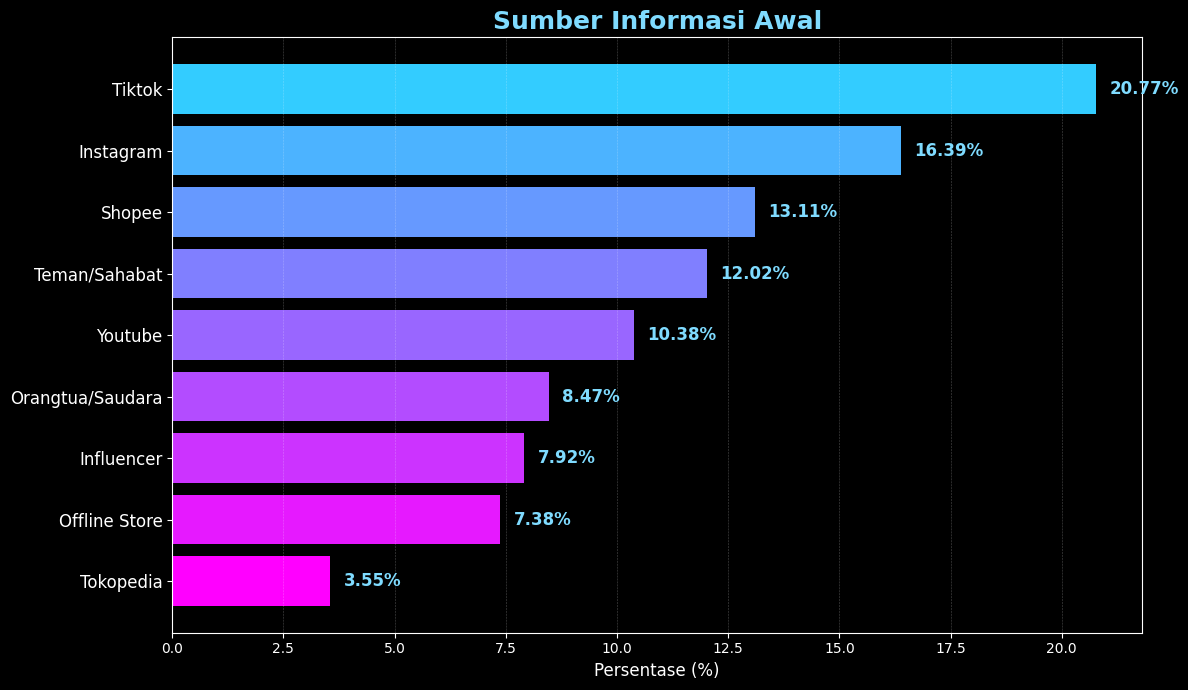

In [ ]:
df = result.copy()
df['Persentase'] = df['Persentase'].str.replace('%','').astype(float)

plt.style.use('dark_background')

plt.figure(figsize=(12, 7))
y_pos = np.arange(len(df))

# Neon blue gradient
colors = plt.cm.cool(np.linspace(0.2, 1, len(df)))

plt.barh(y_pos, df['Persentase'], color=colors)

plt.title('Sumber Informasi Awal',
          fontsize=18, fontweight='bold', color='#7FDBFF')
plt.xlabel('Persentase (%)', fontsize=12, color='white')
plt.yticks(y_pos, df.index, fontsize=12, color='white')

plt.grid(axis='x', linestyle='--', linewidth=0.4, alpha=0.3)

plt.gca().invert_yaxis()

for i, val in enumerate(df['Persentase']):
    plt.text(val + 0.3, i, f"{val:.2f}%",
             va='center', fontsize=12, color='#7FDBFF', fontweight='bold')

plt.tight_layout()
plt.show()


Hasil menunjukkan bahwa TikTok (20,88%) merupakan sumber informasi utama responden dalam mencari atau mengetahui produk parfum, diikuti oleh Instagram (16,47%) dan Shopee (13,82%). Sumber interpersonal seperti teman/sahabat (11,76%) dan orangtua/saudara (7,94%) juga berperan, meskipun lebih kecil dibandingkan media sosial. Platform video seperti YouTube (10%) serta sumber dari influencer (7,94%) dan offline store (7,65%) memberikan kontribusi tambahan, sementara Tokopedia (3,53%) menjadi sumber paling rendah. Secara keseluruhan, pola ini menegaskan dominasi media sosial, khususnya TikTok dan Instagram, sebagai kanal utama dalam penyebaran informasi terkait parfum.

## 2. ***DERIVED IMPORTANCE***


### **A. Lakukan Regresi Logistik**

In [ ]:
from sklearn.linear_model import LogisticRegression

# ===============================
# 1. LOGISTIC REGRESSION
# ===============================

# Variabel SoA sebagai predictor
soa_cols = ['Tiktok', 'Instagram', 'Youtube', 'Shopee',
            'Tokopedia', 'Offline Store', 'Influencer',
            'Teman/Sahabat', 'Orangtua/Saudara']

X = data_reglog[soa_cols]

# Y = 1 jika "Utama = 3", Y = 0 jika <= 2
y = (data_reglog['Utama'] == 3).astype(int)

# Fit model
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X, y)

logit_coefs = logit_model.coef_[0]
logit_coefs

array([ 0.50622564,  0.25189991,  0.2430424 ,  0.47435057,  0.4688232 ,
        0.01628614, -0.49266417,  0.81522246,  0.25023408])

Penelitian ini menggunakan Binary Logistic Regression karena fokus analisis adalah untuk mengidentifikasi faktor-faktor yang mempengaruhi apakah suatu sumber informasi (Source of Awareness) menjadi pilihan utama responden atau tidak. Meskipun variabel Utama memiliki tiga kategori (1, 2, 3), kategori tersebut hanya menunjukkan urutan pilihan responden, bukan tingkatan nilai yang bersifat ordinal. Oleh karena itu, data tidak memenuhi asumsi model ordinal. Untuk menjawab tujuan penelitian secara tepat—yaitu membedakan pilihan utama (kategori 3) dari bukan pilihan utama (kategori 1 dan 2)—maka pendekatan yang paling sesuai adalah Binary Logistic Regression, yang secara khusus dirancang untuk memodelkan kejadian biner (0 dan 1).

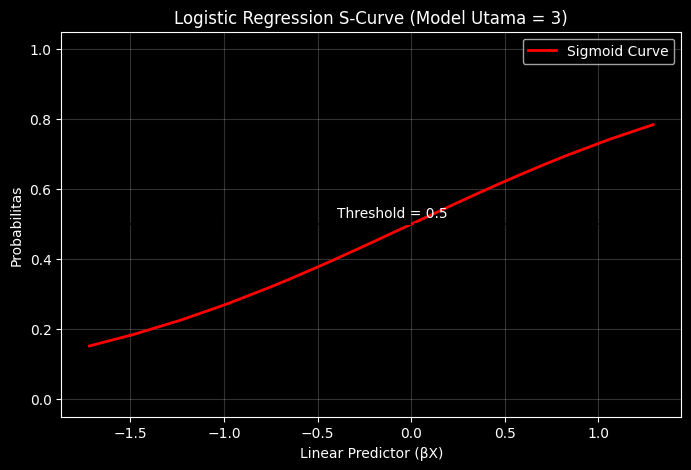

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hitung nilai linear predictor (βX) untuk semua data
z = logit_model.decision_function(X)   # ini = β0 + β1x1 + ... + βnxn

# Sort agar kurva mulus
z_sorted = np.sort(z)
sigmoid = 1 / (1 + np.exp(-z_sorted))

plt.figure(figsize=(8, 5))

# Kurva sigmoid
plt.plot(z_sorted, sigmoid, color='red', linewidth=2, label='Sigmoid Curve')

# Threshold 0.5
plt.axhline(0.5, color='black', linestyle='--')
plt.text(z_sorted.mean(), 0.52, 'Threshold = 0.5', fontsize=10)

# Label sumbu
plt.xlabel("Linear Predictor (βX)")
plt.ylabel("Probabilitas")
plt.title("Logistic Regression S-Curve (Model Utama = 3)")

plt.ylim(-0.05, 1.05)
plt.grid(alpha=0.2)
plt.legend()
plt.show()


### **B. Hitung Odds Ratio Tiap Faktor**

In [ ]:
# ===============================
# 2. HITUNG ODDS RATIO
# ===============================

# Odds Ratio = exp(coef)
odds_ratio = np.exp(logit_coefs)

odds_df = pd.DataFrame({
    'Channel': soa_cols,
    'Coef_Logit': logit_coefs,
    'Odds_Ratio': odds_ratio
}).sort_values(by="Odds_Ratio", ascending=False)

odds_df


,Channel,Coef_Logit,Odds_Ratio
7,Teman/Sahabat,0.815222,2.259678
0,Tiktok,0.506226,1.659018
3,Shopee,0.474351,1.606970
4,Tokopedia,0.468823,1.598112
1,Instagram,0.251900,1.286467
8,Orangtua/Saudara,0.250234,1.284326
2,Youtube,0.243042,1.275123
5,Offline Store,0.016286,1.016419
6,Influencer,-0.492664,0.610996


### **C. Lakukan Normalisasi**

In [ ]:
# ===============================
# 3. NORMALISASI DERIVED IMPORTANCE
# ===============================

# Hitung |OR - 1|
impact = np.abs(odds_ratio - 1)

importance = 100 * impact / impact.sum()

importance_df = pd.DataFrame({
    'Channel': soa_cols,
    'Odds Ratio': odds_ratio,
    '|OR - 1|': impact,
    'Derived Importance (%)': importance
}).sort_values(by="Derived Importance (%)", ascending=False)

importance_df


,Channel,Odds Ratio,|OR - 1|,Derived Importance (%)
7,Teman/Sahabat,2.259678,1.259678,28.791873
0,Tiktok,1.659018,0.659018,15.062855
3,Shopee,1.606970,0.606970,13.873232
4,Tokopedia,1.598112,0.598112,13.670774
6,Influencer,0.610996,0.389004,8.891271
1,Instagram,1.286467,0.286467,6.547647
8,Orangtua/Saudara,1.284326,0.284326,6.498706
2,Youtube,1.275123,0.275123,6.288349
5,Offline Store,1.016419,0.016419,0.375292


Derived importance = seberapa kuat suatu faktor mempengaruhi keputusan konsumen, dihitung memakai model statistik

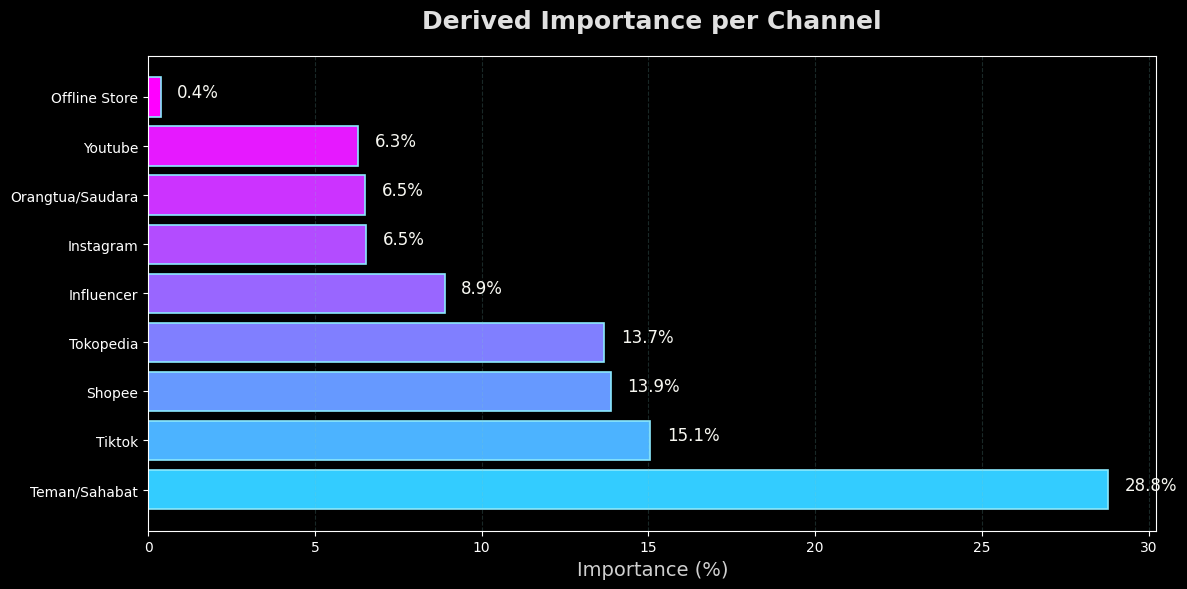

In [ ]:
# ====================================
# Data hasil derived importance
# (asumsikan results adalah DataFrame yang sudah dibuat sebelumnya)
# ====================================
channels = importance_df['Channel']
importance = importance_df['Derived Importance (%)']

# ====================================
# Dark Mode Premium Style
# ====================================
plt.figure(figsize=(12,6))
plt.style.use('dark_background')

# Warna neon premium
colors = plt.cm.cool(np.linspace(0.2, 1, len(channels)))

bars = plt.barh(channels, importance, color=colors)

# Glow Effect
for bar in bars:
    bar.set_edgecolor("#8be9fd")
    bar.set_linewidth(1.2)

# Judul premium
plt.title("Derived Importance per Channel",
          fontsize=18, color="#e0e0e0", weight='bold', pad=20)

# Label sumbu
plt.xlabel("Importance (%)", fontsize=14, color="#cfcfcf")

# Grid tipis neon
plt.grid(axis='x', linestyle='--', alpha=0.2, color="#80cbc4")

# Buat nilai % di ujung bar
for i, v in enumerate(importance):
    plt.text(v + 0.5, i, f"{v:.1f}%", color="#f8f8f2", fontsize=12)

# Margin biar lega
plt.tight_layout()
plt.show()

Claimed awareness = seberapa banyak orang menyebutkan channel tersebut (popularity).

Derived importance = seberapa kuat channel tersebut memengaruhi keputusan (importance).

## 3. **Hitung Nilai Tengah Masing-Masing Sebagai Batas Kuadran**


In [ ]:
# ============================
# NILAI TENGAH (BENCHMARK)
# ============================

# Median atau Mean → pilih salah satu

# Benchmark Claimed Awareness (X-axis)
claimed_benchmark = df['Persentase'].mean()   # atau .median()

# Benchmark Derived Importance (Y-axis)
importance_benchmark = importance_df['Derived Importance (%)'].mean()  # atau .median()

claimed_benchmark, importance_benchmark

(np.float64(11.11), np.float64(11.111111111111109))

In [ ]:
# Prepare df for merging: reset index to convert the 'info_awal' index into a column,
# then rename that column to 'Channel' for consistency.
df_cleaned = df.reset_index().rename(columns={'info_awal': 'Channel'})

# Select only the relevant columns from df_cleaned for the quadrant plot (Channel and Persentase)
df_cleaned = df_cleaned[['Channel', 'Persentase']]

# Merge with importance_df on the common 'Channel' column
quadrant_df = df_cleaned.merge(
    importance_df[['Channel', 'Derived Importance (%)']],
    on='Channel',
    how='inner'
)

quadrant_df

,Channel,Persentase,Derived Importance (%)
0,Tiktok,20.77,15.062855
1,Instagram,16.39,6.547647
2,Shopee,13.11,13.873232
3,Teman/Sahabat,12.02,28.791873
4,Youtube,10.38,6.288349
5,Orangtua/Saudara,8.47,6.498706
6,Influencer,7.92,8.891271
7,Offline Store,7.38,0.375292
8,Tokopedia,3.55,13.670774


/tmp/ipython-input-1867142236.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(quadrant_df))


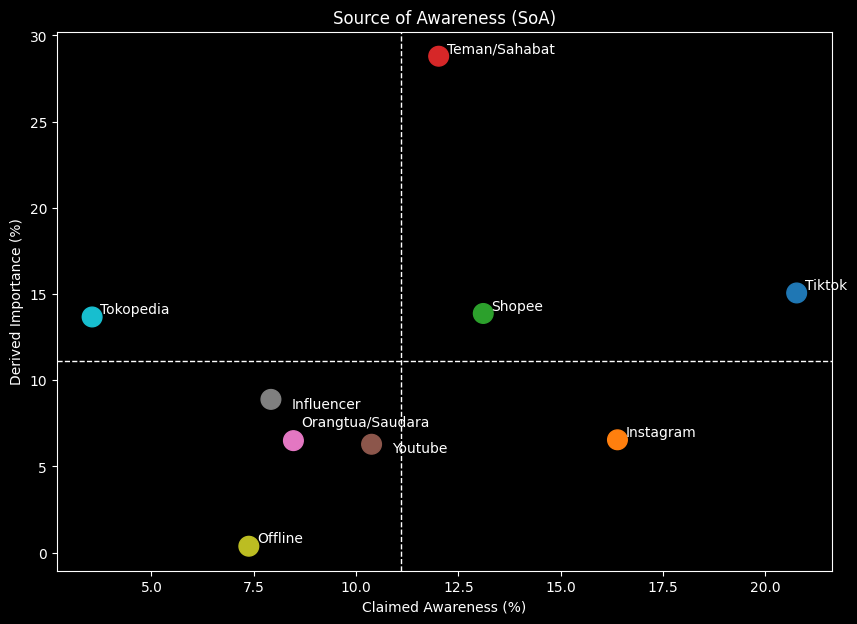

In [ ]:
# Membuat tabel frekuensi SOA
plt.figure(figsize=(10, 7))

# Generate a list of colors, one for each channel
# Using 'tab10' for more distinct categorical colors
colors = plt.cm.get_cmap('tab10', len(quadrant_df))

plt.scatter(
    quadrant_df['Persentase'],
    quadrant_df['Derived Importance (%)'],
    s=200,
    c=range(len(quadrant_df)), # Use index for color mapping
    cmap=colors
)

# Tambahkan label per titik (hanya 1 kata)
for i, row in quadrant_df.iterrows():
    # ambil kata pertama dari nama channel
    short_label = row['Channel'].split()[0]

    # Adjust offsets for specific labels to prevent overlap
    x_offset = 0.2
    y_offset = 0.2

    if row['Channel'] == 'Influencer':
        y_offset = -0.5  # Move 'Influencer' label slightly down
        x_offset = 0.5   # Move 'Influencer' label slightly right
    elif row['Channel'] == 'Orangtua/Saudara':
        y_offset = 0.8 # Move 'Orangtua/Saudara' label slightly up
    elif row['Channel'] == 'Youtube':
        y_offset = -0.5 # Move 'Youtube' label slightly down
        x_offset = 0.5  # Move 'Youtube' label slightly right

    plt.text(
        row['Persentase'] + x_offset,
        row['Derived Importance (%)'] + y_offset,
        short_label,
        fontsize=10
    )

# Garis batas kuadran
plt.axvline(x=claimed_benchmark, linestyle='--', linewidth=1)
plt.axhline(y=importance_benchmark, linestyle='--', linewidth=1)

plt.xlabel("Claimed Awareness (%)")
plt.ylabel("Derived Importance (%)")
plt.title("Source of Awareness (SoA)")

plt.show()

## 4. **Analisis Faktor-Faktornya, Analisis Juga Bagaimana Performa Faktor Tersebut Di Beberapa Brand**


Dari hasil regresi logistik, TikTok dan Instagram muncul sebagai faktor dengan derived importance tertinggi dalam mempengaruhi pilihan utama. Namun, awareness TikTok lebih rendah dibandingkan Instagram, sehingga TikTok memberikan opportunity area untuk brand dengan memperkuat konten digitalnya.

Marketplace (Shopee & Tokopedia) memiliki awareness tinggi namun derived importance rendah, menunjukkan bahwa konsumen sering terpapar, tetapi informasi dari marketplace tidak menentukan keputusan pembelian parfum. Brand sebaiknya mengurangi fokus ke channel ini atau mengubah strategi konten menjadi lebih edukatif.

Word of Mouth (Teman/Sahabat, Orangtua/Saudara) memiliki importance cukup tinggi namun awareness rendah, menjadi ruang besar bagi brand untuk menciptakan kampanye referral atau komunitas.

## 5. **Analisa-Analisa Lainnya**


### ***Visualisasi WordCloud***


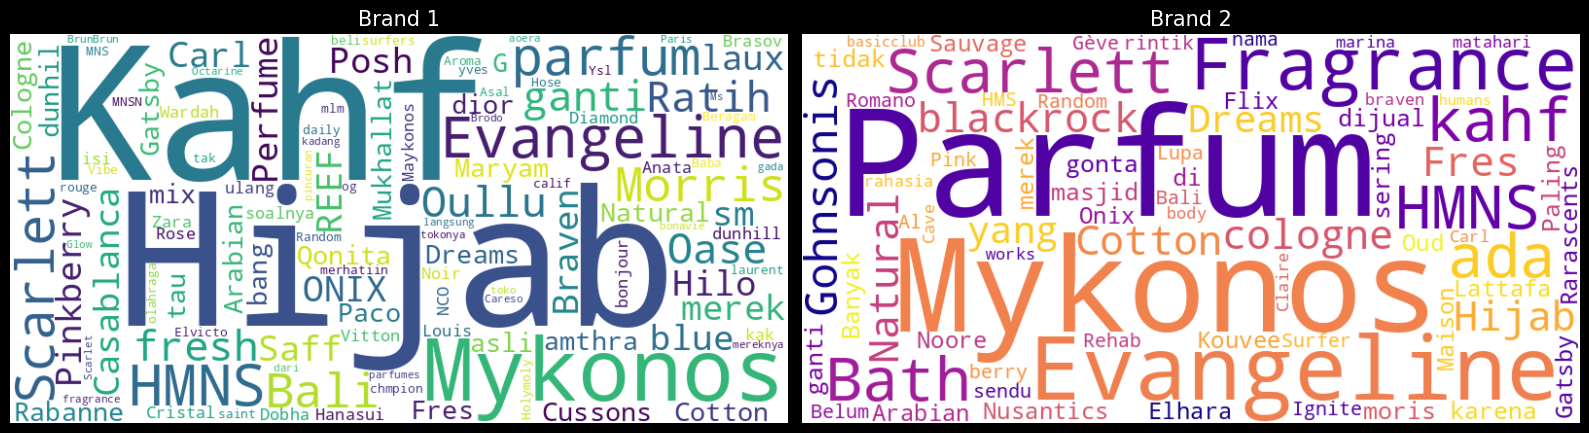

In [ ]:
# Melihat brand/merek parfum yang sering dipakai oleh kalangan mahasiswa UIN Jakarta
text_brand_1 = " ".join(data['brand_1'].dropna().astype(str))
text_brand_2 = " ".join(data['brand_2'].dropna().astype(str))

# Create WordCloud objects for Brand 1
wc_brand_1 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate(text_brand_1)

# Create WordCloud objects for Brand 2
wc_brand_2 = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='plasma'
).generate(text_brand_2)

# Plotting the WordClouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_brand_1, interpolation='bilinear')
plt.axis('off')
plt.title('Brand 1', fontsize=15)

plt.subplot(1, 2, 2)
plt.imshow(wc_brand_2, interpolation='bilinear')
plt.axis('off')
plt.title('Brand 2', fontsize=15)

plt.tight_layout()
plt.show()

### **Perbandingan Pembelian Parfum Pada Kampus 1 dan Kampus 2**

In [ ]:
df_brand1_price = data[['id', 'kampus', 'harga_1']].copy()
df_brand1_price.rename(columns={'harga_1': 'harga_category'}, inplace=True)

df_brand2_price = data[['id', 'kampus', 'harga_2']].copy()
df_brand2_price.rename(columns={'harga_2': 'harga_category'}, inplace=True)

df_campus_price = pd.concat([df_brand1_price, df_brand2_price], ignore_index=True)

df_campus_price = df_campus_price[df_campus_price['harga_category'].str.strip() != ''].copy()

df_campus_price.head(10)

,id,kampus,harga_category
0,A001,Gedung kampus 1,Rp100.000 - Rp300.000
1,A002,Gedung kampus 1,< Rp100.000
2,A003,Gedung kampus 1,< Rp100.000
3,A004,Gedung kampus 1,< Rp100.000
4,A005,Gedung kampus 1,Rp100.000 - Rp300.000
5,A006,Gedung kampus 2,< Rp100.000
6,A007,Gedung kampus 1,Rp100.000 - Rp300.000
7,A008,Gedung kampus 2,< Rp100.000
8,A009,Gedung kampus 2,Rp100.000 - Rp300.000
9,A010,Gedung kampus 1,< Rp100.000


In [ ]:
price_campus_distribution = df_campus_price.groupby('kampus')['harga_category'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
price_campus_distribution = price_campus_distribution.loc[:, ['< Rp100.000', 'Rp100.000 - Rp300.000', '> Rp300.000']]

display(price_campus_distribution)

harga_category,< Rp100.000,Rp100.000 - Rp300.000,> Rp300.000
kampus,,,
Gedung kampus 1,50.000000,44.047619,5.952381
Gedung kampus 2,50.666667,38.666667,10.666667


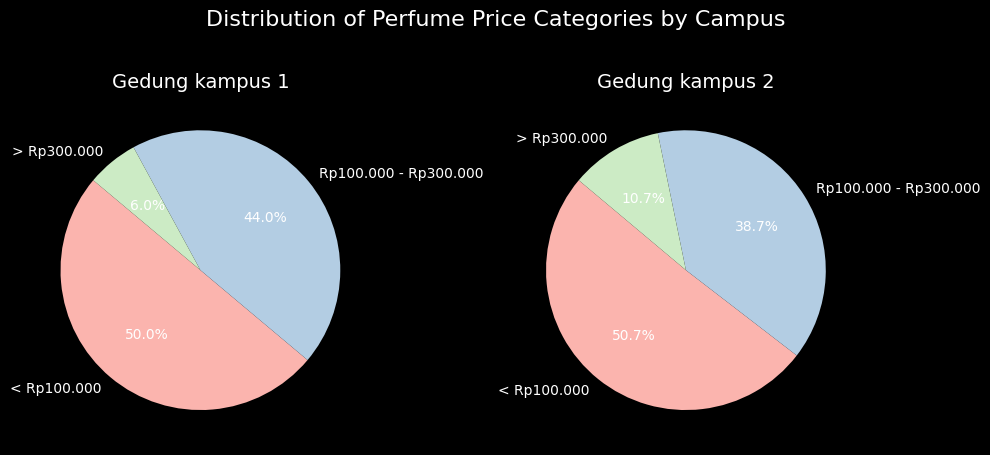

In [ ]:
campuses = price_campus_distribution.index
n = len(campuses)

# warna soft / muted
colors = plt.cm.Pastel1.colors

fig, axes = plt.subplots(1, n, figsize=(5*n, 5))

for i, campus in enumerate(campuses):
    axes[i].pie(
        price_campus_distribution.loc[campus],
        labels=price_campus_distribution.columns,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors[:len(price_campus_distribution.columns)]
    )
    axes[i].set_title(campus, fontsize=14)

plt.suptitle('Distribution of Perfume Price Categories by Campus', fontsize=16)
plt.tight_layout()
plt.show()

### **Rating pada Brand 1 dan Brand 2**

In [ ]:
df1 = data[['brand_1', 'rating_1']]
df2 = data[['brand_2', 'rating_2']].rename(
    columns={'brand_2': 'brand_1', 'rating_2': 'rating_1'}
)

data_final = pd.concat([df1, df2], ignore_index=True)
data_final = data_final.dropna()
data_final

,brand_1,rating_1
0,mykonos,9
1,Posh hijab,7
2,evangeline,9
3,Qonita - Maryam,7
4,ONIX,10
...,...,...
217,,
218,,
219,,
220,,


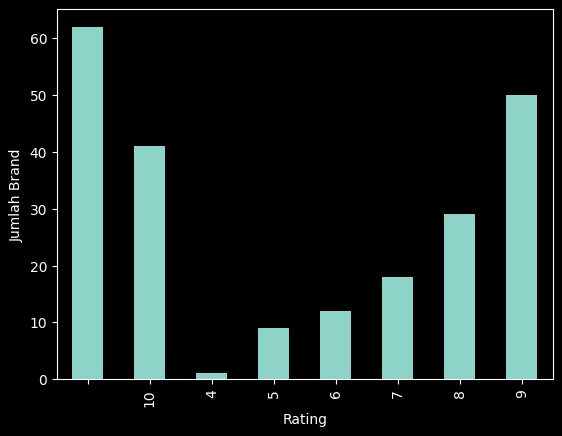

In [ ]:
data_final['rating_1'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Jumlah Brand')
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129760 (\N{MELTING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


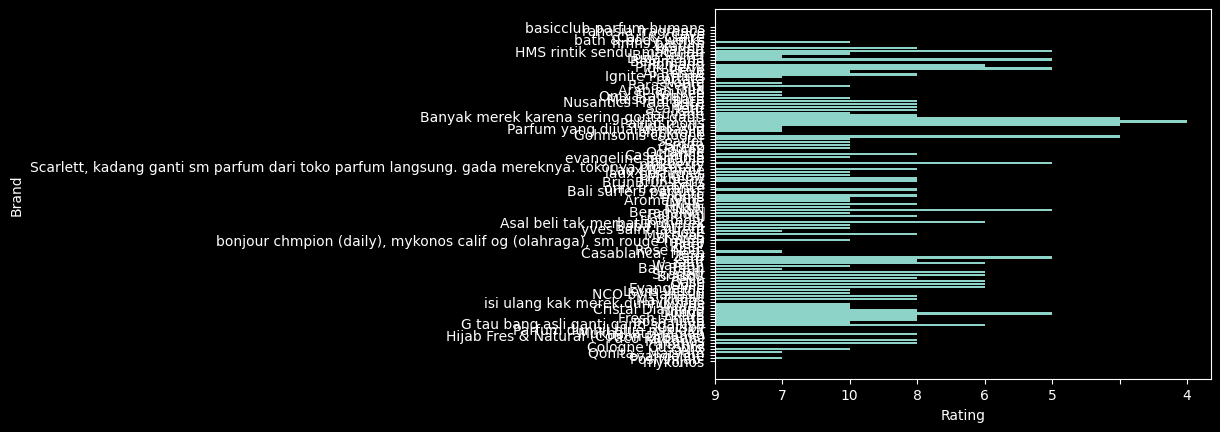

In [ ]:
df_plot = data_final.dropna()

plt.figure()
plt.barh(df_plot['brand_1'], df_plot['rating_1'])
plt.xlabel('Rating')
plt.ylabel('Brand')
plt.show()

In [ ]:
data_rated_10 = data_final[data_final['rating_1'] == '10']
data_rated_10.head()

,brand_1,rating_1
4,ONIX,10
13,G tau bang asli.ganti ganti soalnya,10
16,HMNS,10
18,Cristal Diamond,10
19,Morris,10


**Reasoning**:
Now that `data_rated_10` is filtered, I need to extract the brand names from this DataFrame, clean them, and then concatenate them into a single string to generate the word cloud visualization as requested by the main task.



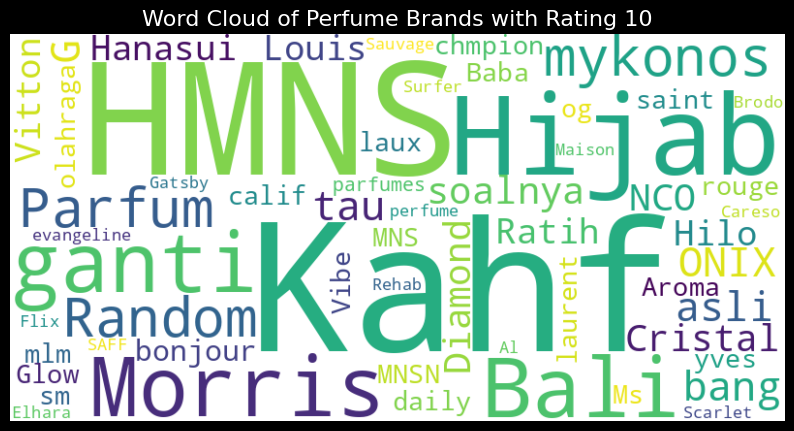

In [ ]:
cleaned_brands_rated_10 = data_rated_10['brand_1'].astype(str).str.strip()
cleaned_brands_rated_10 = cleaned_brands_rated_10[
    (cleaned_brands_rated_10 != '') &
    (cleaned_brands_rated_10 != '-') &
    (cleaned_brands_rated_10.str.lower() != 'nan')
]

text_for_wordcloud_rated_10 = " ".join(cleaned_brands_rated_10)

if text_for_wordcloud_rated_10:
    wordcloud_rated_10 = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        contour_color='steelblue',
        contour_width=1
    ).generate(text_for_wordcloud_rated_10)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud_rated_10, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Perfume Brands with Rating 10', fontsize=16, color='white')
    plt.show()
else:
    print("No valid brand names with rating 10 found to generate a word cloud.")